Part 1

I started off with quering data for the salary and then looking through each of the teams' data.
After that, I continue with obtaining the data for their win rate for each of the teams.
I then overcome the missing data by merging the two tables I made.

In [12]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import matplotlib.pyplot as plt

sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

salary_query = "SELECT teamID, yearID, sum(salary) as total_payroll FROM Salaries GROUP BY teamID, yearID ORDER BY teamID"

#Inquiring the team salaries
team_salaries = pd.read_sql(salary_query, conn)

win_query = "SELECT teamID, yearID, sum(W) as wins, sum(W)+sum(L) as games, ((W*1.0 / G*1.0) * 100.0) as win_percentage, franchID FROM teams GROUP BY teamID,yearID ORDER BY teamID"

#Inquiring the team win rate
team_win_rate = pd.read_sql(win_query, conn)

#Merging both of the tables in order to remove the missing data in the dataframe
table = team_salaries.merge(team_win_rate, how = "inner", left_on = ["teamID","yearID"], right_on = ["teamID","yearID"])
table.head(len(table))

,teamID,yearID,total_payroll,wins,games,win_percentage,franchID
0,ANA,1997,31135472.0,84,162,51.851852,ANA
1,ANA,1998,41281000.0,85,162,52.469136,ANA
2,ANA,1999,55388166.0,70,162,43.209877,ANA
3,ANA,2000,51464167.0,82,162,50.617284,ANA
4,ANA,2001,47535167.0,75,162,46.296296,ANA
...,...,...,...,...,...,...,...
853,WAS,2010,61400000.0,69,162,42.592593,WSN
854,WAS,2011,63856928.0,80,161,49.689441,WSN
855,WAS,2012,80855143.0,98,162,60.493827,WSN
856,WAS,2013,113703270.0,86,162,53.086420,WSN


Part 2

Problem 2

For this part, I decided to use the scatterplot in order to illustrate the distribution of the payrolls from 1990 - 2014

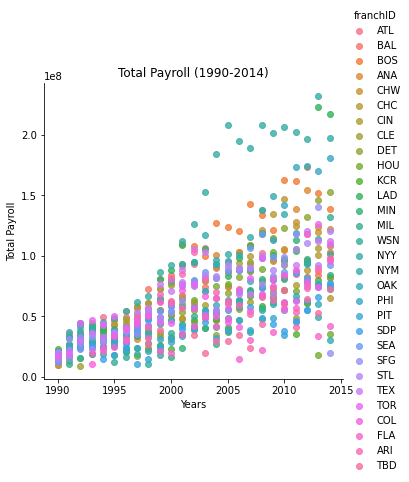

In [13]:
#Creating a salary dataframe so that we could remove the hassle and just use the wanted data 
salary_query = "WITH tempTable AS (SELECT Salaries.yearID, Salaries.teamID, Teams.franchID, SUM(Salaries.salary) as total_payroll FROM Salaries, \
Teams WHERE Salaries.teamID = Teams.teamID AND Salaries.yearID = Teams.yearID AND Salaries.yearID >= 1990 AND \
Salaries.yearID <= 2014 GROUP BY Salaries.yearID, Salaries.teamID) SELECT * FROM tempTable"
salary_df = pd.read_sql(salary_query, conn)

#Using the scatterplot and differentiate them according to hue 
#Just because it's easier to differentiate and also it looks colorful and fun to look at
sns.lmplot(x="yearID", y="total_payroll", data=salary_df, fit_reg=False, hue='franchID', legend=True, palette=sns.color_palette("husl", len(salary_df.franchID.unique())))
plt.xlabel("Years") 
plt.ylabel("Total Payroll")
plt.title("Total Payroll (1990-2014)")
plt.show()

Based on this, as much as it is hard to see the distribution of each of teams, but from this, 
we can clearly see how the centrality and the spread had changed throughout 1990 - 2014.

Question 1

Since 1990, the spread between the distribution of payrolls has increased. From 1990, we can see that the distribution has its uniform of distribution as they are 'centralized' since they are really tight and packed together. However, a bit further from 1995, we can see that the distribution began to slowly spread apart as the teams are spending more.

From this statement, we can conclude that the mean for the salary payment has been increasing throughout the years. As we can see from 1990, the distribution among the teams are only in between 0.0 to 0.5. However, as it progresses, we can see that it is getting more apart from each other. We can also know that they are spending more towards salary payment.

Not only that, we can also see the median also increase and we can also make a statement that the standard deviation also increases due to the disparate salaray payment from each team. For example, we can see that the New York Yankees has paid the most and at the same time, a lot of the franchises has not spend as much as the Yankees, which leads to the huge standard deviation difference as compared to the standard deviation in the early 1990s.

Problem 3

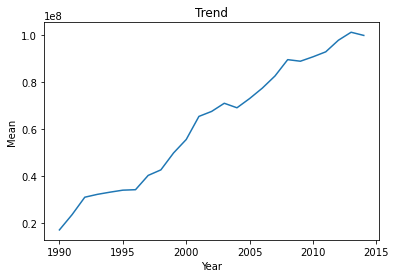

In [14]:
#For this problem, I would plot a graph of how much of the mean of the payroll has increased throughout the years
table = table.loc[table['yearID'] > 1989]
mean_trend=(table[['yearID','total_payroll']].groupby('yearID')).mean()
plt.plot(mean_trend.index, mean_trend['total_payroll'])
plt.xlabel("Year")
plt.ylabel("Mean")
plt.title("Trend")
plt.show()

From this alone, we can see that how much of an increase it has get in seeing the mean of the payroll throughout 1990 until 2014.

Problem 4

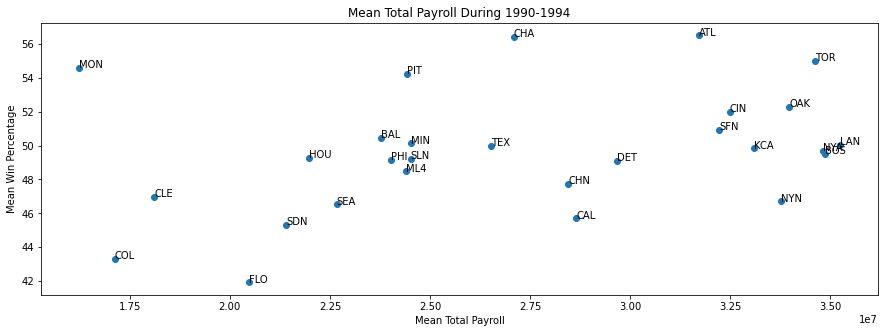

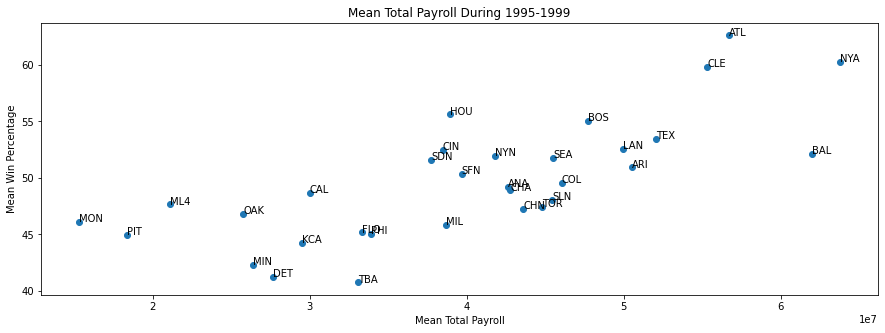

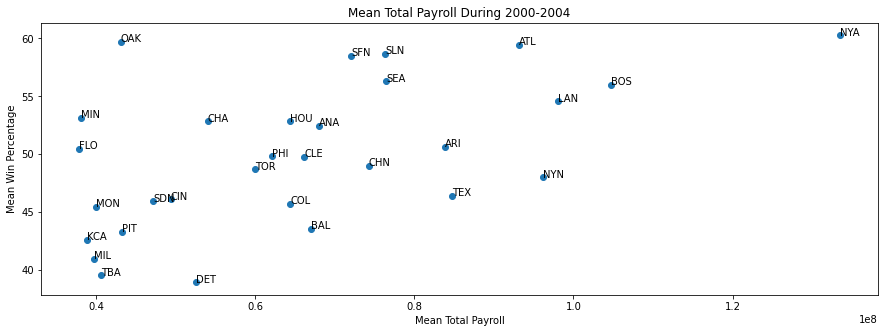

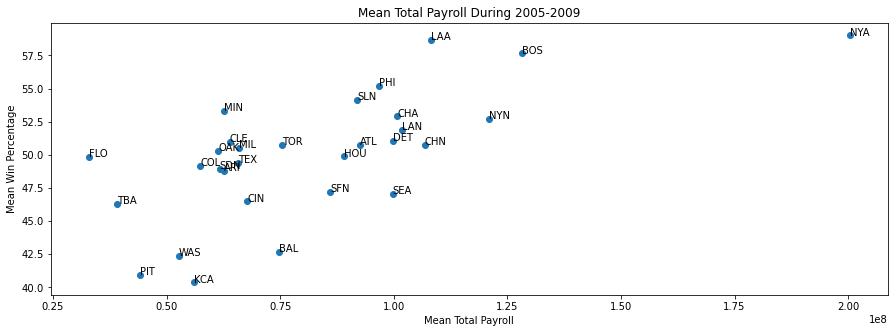

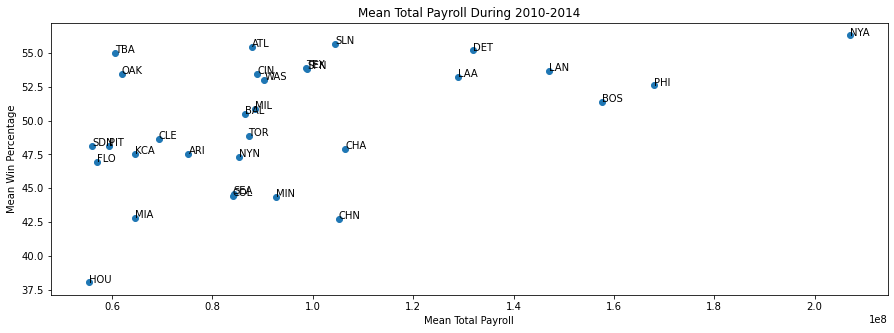

In [15]:
teams = np.unique(table['teamID'])
#Binning these into 5 different periods of times
bins = ['1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014']
period = [1,2,3,4,5]
#Createing a column that puts the years into 5 periods
table['periods'] = pd.cut(table.yearID, 5, labels = period)

#Using this loop to get the mean for the winning percentage and the mean of the total pay roll for each period
for i in period:
    #Creating two arrays that puts for the total payroll and another for the winning percentage
    x = []
    y = []
    duration = table[table['periods'] == i]
    # Makes a point for each team
    for j in teams:   
        team = duration[duration['teamID'] == j]
        x.append(team['total_payroll'].mean())
        y.append(team['win_percentage'].mean())
    plt.figure(figsize=(15,5))
    plt.plot(x,y, 'o')
    #Labels all points
    #Since we are labelling the mean according the teams,
    #We would then label all of the dots as the teams
    for idx, name in enumerate(teams):
        plt.annotate(name, (x[idx], y[idx]), size = 10)
        
    #Creating labels for the graphs
    #We assigned x as the payroll while y is assigned for the winning percentage
    plt.xlabel("Mean Total Payroll")
    plt.ylabel("Mean Win Percentage")
    plt.title("Mean Total Payroll During " + bins[i-1])
    plt.show()  

Question 2

As we can see from the plots above, we can see that the more money you pay, the higher the probability for you to win the championship. The biggest proof that we can see would be the New York Yankees (NYA) performances, during the period 2000-2015. They had the biggest mean for the total payroll and as stated above, they also had the biggest mean winning percentage. There will be a few instances where the teams had a really low mean of total payroll and had a high mean in winning percentage, but that happens rarely. For instance, Oakland Athletics (OAK) had a really low mean total payroll of 3.0 but had a high winning percentage in the 2000-2004 period.

Part 3

Problem 5

In [16]:
#Creating two datas of which consist of mean of the payroll and also the standard deviation of the payroll
#Using the groupby function in order to get the mean and the standard deviation according to the year
#Creating another table so that we could append all of the data and then use it to add into the new column of the new_table data
new_table = table.copy()
table = table.loc[table['yearID'] > 1989]
mean_payroll = (table.groupby(['yearID']))['total_payroll'].mean()
std_payroll = mean_payroll = (table.groupby(['yearID']))['total_payroll'].std()
std_column = []

#Feels like there were few unnecessary columns in the table
#Since I am using a copied table, I would just drop columns that
#I feel irrelevant and at the same time not modifying the actual table
new_table = new_table.drop('wins', axis=1)
new_table = new_table.drop('games', axis=1)

#Iterating through each of the table and then use the formula given
#Append the data in the std_column table
for idx, row in table.iterrows():
    std_column.append((row['total_payroll']-mean_payroll[row['yearID']]) / std_payroll[row['yearID']])

new_table['std_payroll'] = std_column

#Rearranging the new_table to look it nicer
new_table = new_table[['teamID', 'franchID', 'yearID', 'total_payroll', 'std_payroll', 'win_percentage', 'periods']]
new_table

,teamID,franchID,yearID,total_payroll,std_payroll,win_percentage,periods
0,ANA,ANA,1997,31135472.0,1.383900,51.851852,2
1,ANA,ANA,1998,41281000.0,1.683929,52.469136,2
2,ANA,ANA,1999,55388166.0,1.693803,43.209877,2
3,ANA,ANA,2000,51464167.0,1.403046,50.617284,3
4,ANA,ANA,2001,47535167.0,0.923900,46.296296,3
...,...,...,...,...,...,...,...
853,WAS,WSN,2010,61400000.0,0.610913,42.592593,5
854,WAS,WSN,2011,63856928.0,0.564662,49.689441,5
855,WAS,WSN,2012,80855143.0,1.196104,60.493827,5
856,WAS,WSN,2013,113703270.0,1.328540,53.086420,5


Problem 6

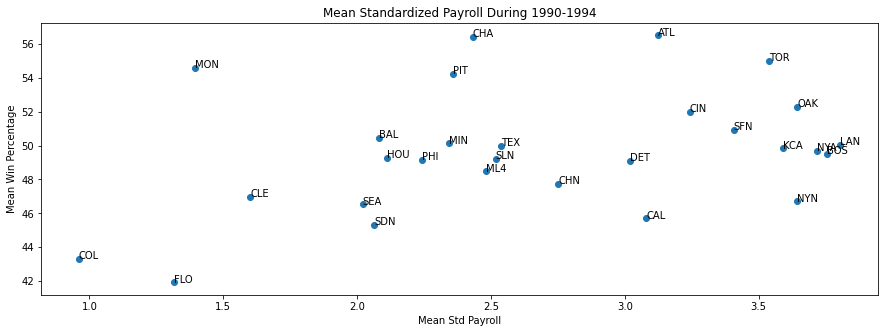

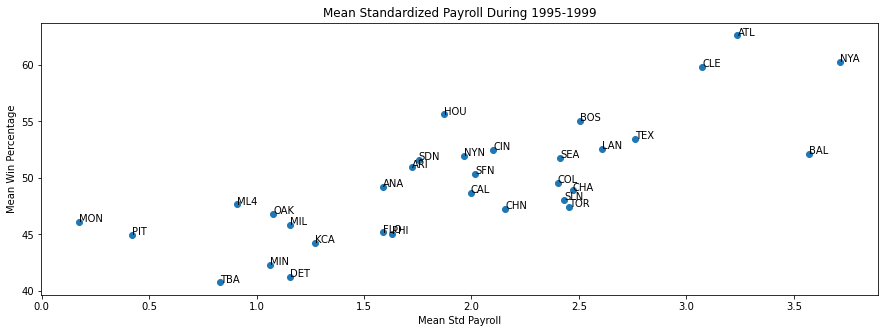

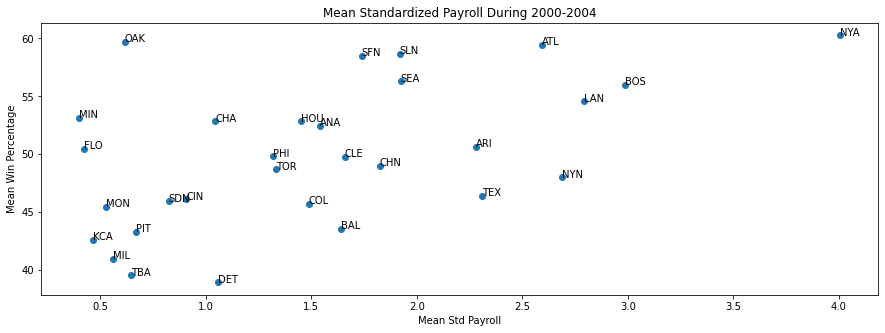

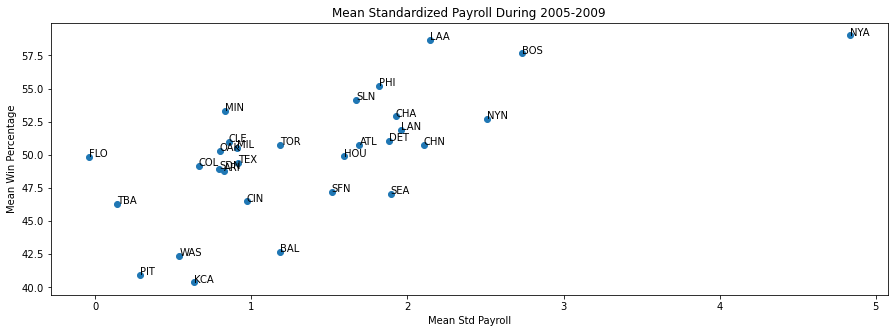

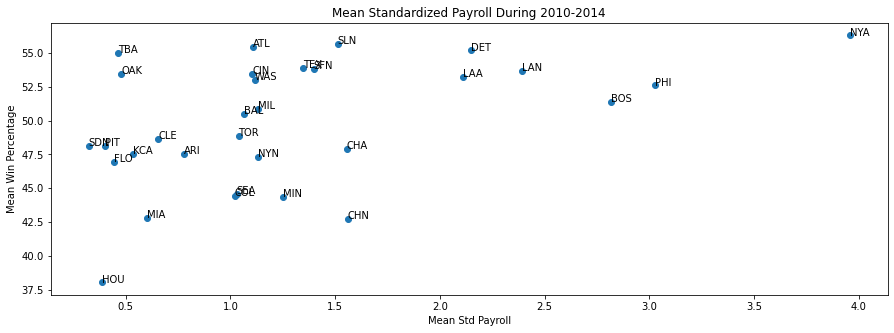

In [17]:
#Since the question is as the same as the Problem 4, I would just use the same way I did to do for Problem 4
bins = ['1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014']
period = [1,2,3,4,5]
for i in period:
    #Creating two arrays that puts for the standardized payroll and another for the winning percentage
    x = []
    y = []
    duration = new_table[new_table['periods'] == i]
    # Makes a point for each team
    for j in teams:   
        team = duration[duration['teamID'] == j]
        x.append(team['std_payroll'].mean())
        y.append(team['win_percentage'].mean())
    plt.figure(figsize=(15,5))
    plt.plot(x,y, 'o')
    #Labels all points
    #Since we are labelling the mean according the teams,
    #We would then label all of the dots as the teams
    for idx, name in enumerate(teams):
        plt.annotate(name, (x[idx], y[idx]), size = 10)
        
    #Creating labels for the graphs
    #We assigned x as the std payroll while y is assigned for the winning percentage
    plt.xlabel("Mean Std Payroll")
    plt.ylabel("Mean Win Percentage")
    plt.title("Mean Standardized Payroll During " + bins[i-1])
    plt.show()  

Question 3

How do the plots from Problem 4 and Problem 6 reflect the transformation you did on the payroll variable? Well, as we can see, the winning percentage maintains the same way as in Problem 4 with Problem 6. This shows that the relation between the graphs in Problem 4 and Problem 6 maintains the same way. However, we can also see that the graphs between periods are having a pattern as they getting to look more similar as compared to Problem 4, which looks more scattered and makes the graphs in Problem 6 to have a better comparison in between periods when compared to graphs in Problem 4.

Problem 7

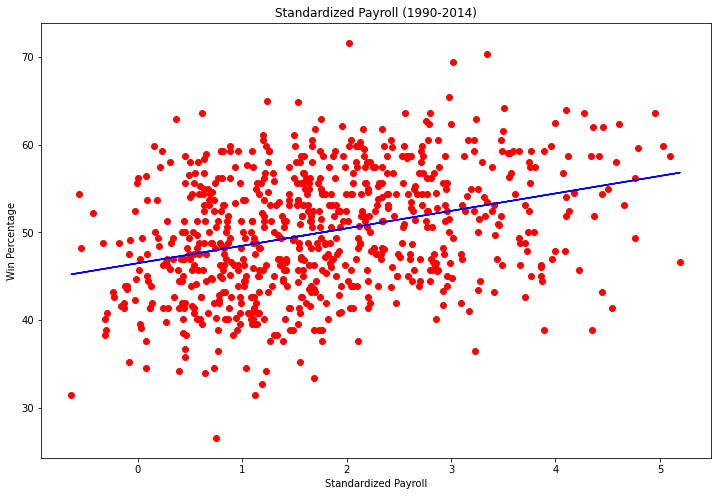

In [18]:
#Using Linear Regression in making the scatterplot for the standardized payroll and the winning percentage
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
#Getting them as numpy arrays so that we could use them and 'fit' in the linear regressor
std_payroll = (new_table['std_payroll'].values).reshape(-1,1)
win_percent = (new_table['win_percentage'].values).reshape(-1,1)
linear_regressor.fit(std_payroll,win_percent)
#With the linear regressor, we could use it and 'predict' 
predict = linear_regressor.predict(std_payroll)

#Creates labels for the graphs
plt.figure(figsize=(12,8))
plt.scatter(std_payroll, win_percent, color ='red')
plt.plot(std_payroll, predict, color='blue')
plt.title("Standardized Payroll (1990-2014)")
plt.xlabel("Standardized Payroll")
plt.ylabel("Win Percentage")
plt.show()

#Using this for our next graph to use in Problem 8
expected_win = new_table[['yearID', 'teamID', 'win_percentage', 'std_payroll']].copy()
expected_win['expected_win_percent'] = expected_win['std_payroll']*2.5+50

Problem 8

<function matplotlib.pyplot.show(close=None, block=None)>

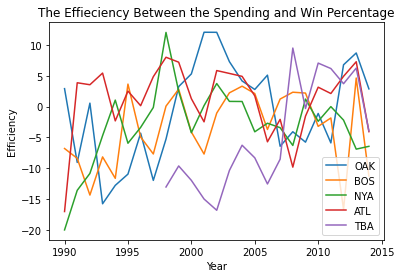

In [19]:
#For this problem, we would copy another table
#But this time, we would only consist of the years, team IDs, win percentage, and the expected win
#We have already calculated the expected win of the teams from the previous columns
table8 = new_table[['yearID', 'teamID', 'win_percentage']].copy()
#Since we want the data only from 1990 - 2014
table8 = table8.loc[table8['yearID'] > 1989]
table8['expected_win'] = expected_win['expected_win_percent']

#Since we want the efficiency, we would subtract the actual winning percentage and the expected win 
#To see how efficient of each of the teams that we will use in this subplot graph
table8['efficiency'] = table8['win_percentage'] - expected_win['expected_win_percent']
#As in the question, we would only take OAK, NYA, ATL, TBA, and BOS in this graph
teams = ['OAK', 'BOS', 'NYA', 'ATL', 'TBA']
fig, ax = plt.subplots()

#Plotting the efficiency for each teams throughout the years
for i in teams:
    team = table8[table8['teamID'] == i]
    ax.plot(team['yearID'], team['efficiency'], label = i)
    
#Plotting the Legends to see each of the teams, the title, the x-axis and the y-axis
plt.legend(['OAK', 'BOS', 'NYA', 'ATL', 'TBA'])
plt.title("The Effieciency Between the Spending and Win Percentage")
plt.xlabel("Year")
plt.ylabel("Efficiency")
plt.show


Question 4

As we can see from this, we can note that there is a positive efficiency based on Question 2 if we take a look at the teams ATL, OAK and NYA. Also, as I mentioned earlier in Question 2 regarding OAK, they had a really huge positive efficiency from the 2000-2004 period but based on Question 2 and 3, it was not as noticable as the graph we did in Question 4. One of the reasons why is because in Question 2, we could not see that unless you had a huge spending and in Oakland's case, it is quite the opposite. We were looking towards the correlation in between the payroll and the winning percentage, which explains we were not really noticing the Oakland's huge efficiency during the Moneyball period. With that claim, I would be certain to say that the Oakland Athletics had a huge positive efficiency during the Moneyball period. 

Extra Credit